used to convert non-normal distribution data into normal distribution data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv(r"C:\Users\Shubham Pandey\Downloads\loan.csv")
dataset.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


C:\Users\Shubham Pandey\AppData\Local\Temp\ipykernel_4208\1899262194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


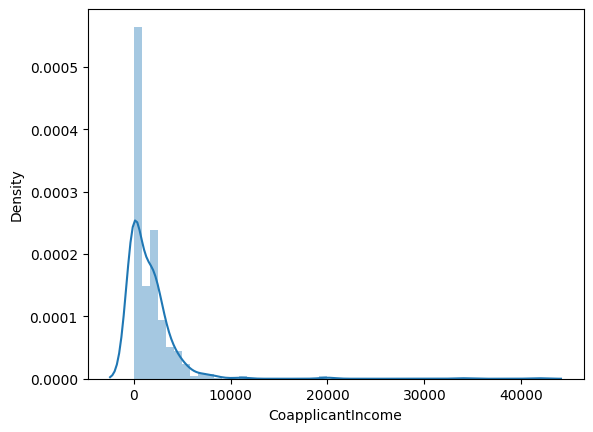

In [4]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

In [6]:
q1=dataset["CoapplicantIncome"].quantile(0.25)
q3=dataset["CoapplicantIncome"].quantile(0.75)  
iqr=q3-q1

min_range=q1-1.5*iqr
max_range=q3+1.5*iqr
print("Minimum Range:", min_range)
print("Maximum Range:", max_range)

Minimum Range: -3445.875
Maximum Range: 5743.125


In [8]:
dataset= dataset[dataset["CoapplicantIncome"]<max_range]
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


C:\Users\Shubham Pandey\AppData\Local\Temp\ipykernel_4208\2622998167.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


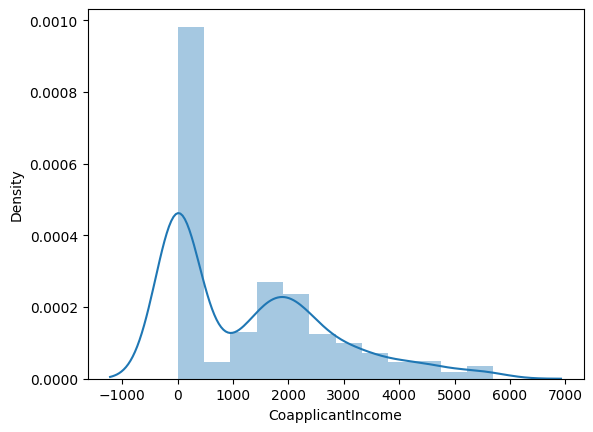

In [9]:
sns.distplot(dataset["CoapplicantIncome"])
plt.show()


In [10]:
from sklearn.preprocessing import FunctionTransformer

In [11]:
ft= FunctionTransformer(func=np.log1p)

In [12]:
ft.fit(dataset[["CoapplicantIncome"]])

,func,<ufunc 'log1p'>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [13]:
dataset["CoapplicantIncome_tf"] = ft.transform(dataset[["CoapplicantIncome"]])

C:\Users\Shubham Pandey\AppData\Local\Temp\ipykernel_4208\930529037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf"])
C:\Users\Shubham Pandey\AppData\Local\Temp\ipykernel_4208\930529037.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantInc

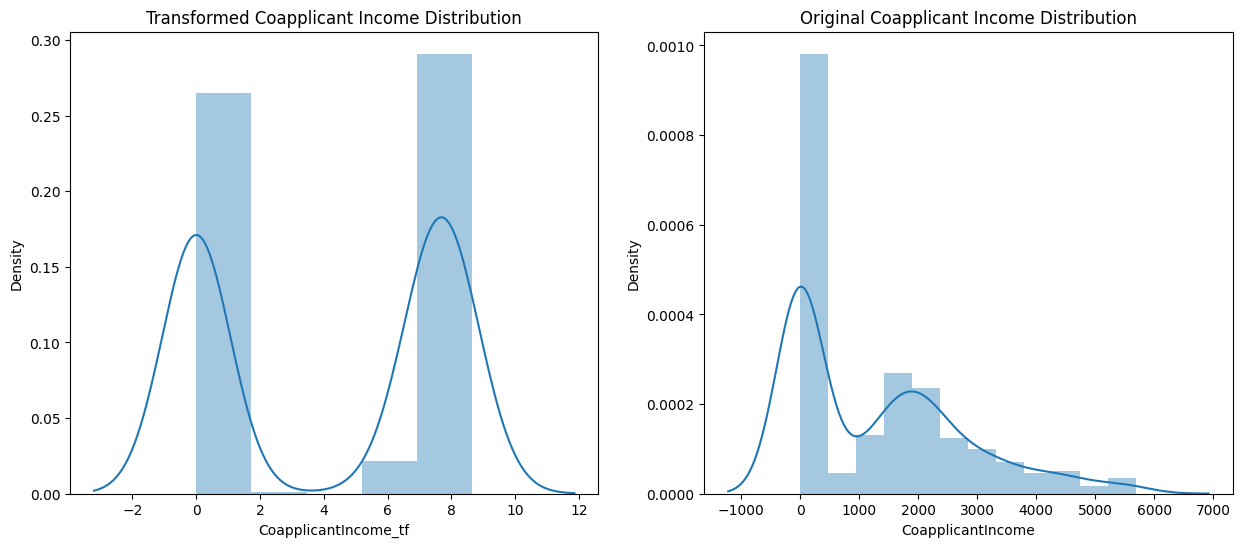

In [15]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(dataset["CoapplicantIncome_tf"])
plt.title("Transformed Coapplicant Income Distribution")   
plt.subplot(1, 2, 2) 
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Original Coapplicant Income Distribution")
plt.show()

You can use any function to normalise the data for example log1p, x^2 etc

In [18]:
ft1= FunctionTransformer(func=lambda x : x**2)
ft1.fit(dataset[["CoapplicantIncome"]])
dataset["CoapplicantIncome_tf1"] = ft1.transform(dataset[["CoapplicantIncome"]])

C:\Users\Shubham Pandey\AppData\Local\Temp\ipykernel_4208\3386610207.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome_tf1"])
C:\Users\Shubham Pandey\AppData\Local\Temp\ipykernel_4208\3386610207.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Coapplicant

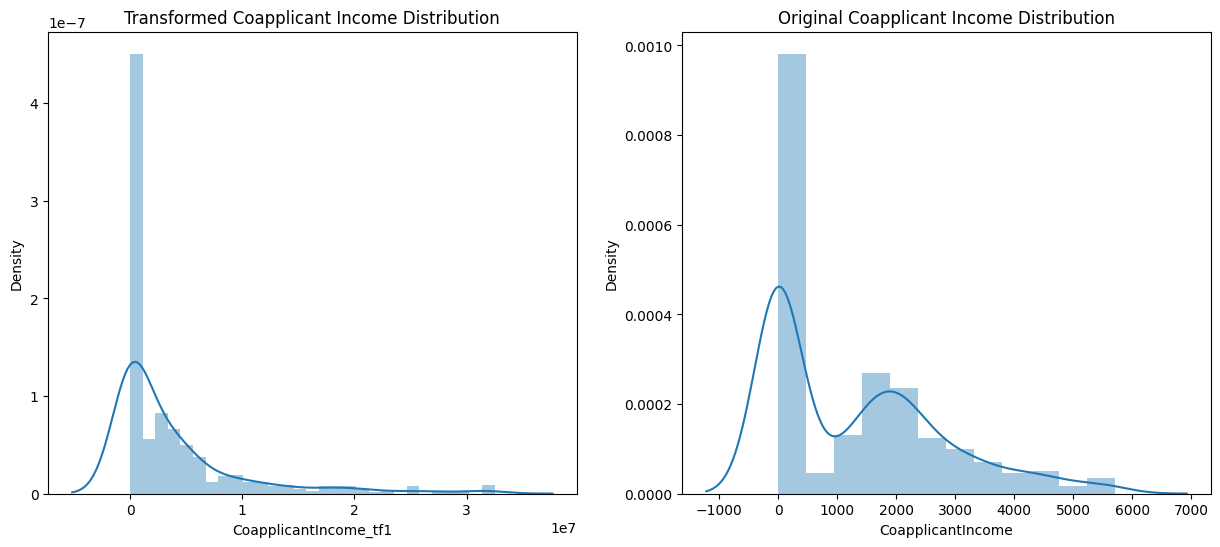

In [19]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.distplot(dataset["CoapplicantIncome_tf1"])
plt.title("Transformed Coapplicant Income Distribution")   
plt.subplot(1, 2, 2) 
sns.distplot(dataset["CoapplicantIncome"])
plt.title("Original Coapplicant Income Distribution")
plt.show()